### LINEAR REGRESSION 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
INFOSYS=pd.read_csv("INFY.NS.csv")
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [4]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [5]:
INFOSYS.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1223,False,False,False,False,False,False,False
1224,False,False,False,False,False,False,False
1225,False,False,False,False,False,False,False
1226,False,False,False,False,False,False,False


In [6]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [7]:
INFOSYS_NEW=INFOSYS.dropna(axis = 0)
INFOSYS_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
...,...,...,...,...,...,...,...
1223,2020-06-23,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,2020-06-24,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,2020-06-25,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,2020-06-26,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0


In [8]:
INFOSYS_NEW.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [9]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [10]:
INFOSYS_NEW['Date']=pd.to_datetime(INFOSYS_NEW['Date'])

In [11]:
print(f'DataFrame contains Stock Prices between {INFOSYS_NEW.Date.min()} {INFOSYS_NEW.Date.max()}')
print(f'Total Days = {(INFOSYS_NEW.Date.max()- INFOSYS_NEW.Date.min()).days} days')

DataFrame contains Stock Prices between 2015-07-01 00:00:00 2020-06-29 00:00:00
Total Days = 1825 days


In [12]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS_NEW['Date'], 'y':INFOSYS_NEW['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [13]:
iplot(plot)

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [15]:
X= np.array(INFOSYS_NEW.index).reshape(-1,1)
Y= INFOSYS_NEW['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [16]:
scaler = StandardScaler().fit(X_train)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Model.score(X_train, Y_train)

0.53336040894479

In [20]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = Model.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

INFOSYS_DATA = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=INFOSYS_DATA, layout=layout)

In [21]:
iplot(plot2)

In [22]:
val = Model.score(X_train, Y_train) * 100

In [23]:
print("Accuracy %.2f" % val,"%")

Accuracy 53.34 %


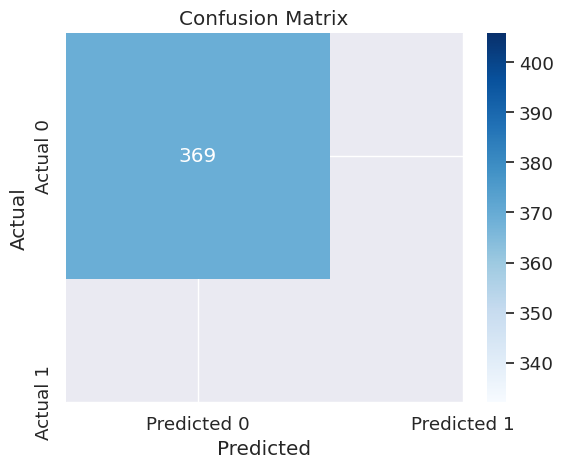

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       369

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Set a threshold for classification
threshold = 0.5

# Convert predicted values to binary classes
Y_pred_binary = np.where(Model.predict(X_test) > threshold, 1, 0)

# Convert actual values to binary classes
Y_test_binary = np.where(Y_test > threshold, 1, 0)

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test_binary, Y_pred_binary)

# Set the color map to "Blues"
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(Y_test_binary, Y_pred_binary))
